In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [2]:
#files=glob('/Volumes/YONE/numericalresults/data_gauss_n-1_meanfield*/*')
Kss=[np.arange(0.12,2.12,0.01),np.arange(0.15,2.15,0.01),np.arange(0.18,2.18,0.01),np.arange(0.27,2.27,0.01)]
ns=[1,2,3,'inf']
sizes=[100,200,400,800,1600,3200,]

In [3]:
for i in tqdm(range(4)):
    n=ns[i]
    Ks=Kss[i]
    for size in tqdm(sizes):
        files=glob(f'/Volumes/YONE/numericalresults/data_gauss_n-{n}_p-0.2_*/size-{size}_*')
        aa=[np.load(file)[:,-2000:] for file in files]
        aa=np.array(aa)
        aa=aa.transpose(1,0,2).mean(axis=2)
        mean=np.mean(aa,axis=1)
        std=np.std(aa,axis=1)
        output=np.array([[Ks[i],mean[i],std[i]] for i in range(200)])
        np.savetxt(f'mf_n-{n}_size-{size}.txt',output)

100%|██████████| 4/4 [39:55<00:00, 590.46s/it]


In [4]:
aa=[np.load(file)[:,-2000:] for file in tqdm(files)]

100%|██████████| 1000/1000 [01:27<00:00, 11.40it/s]


In [5]:
aa=np.array(aa)

In [6]:
aa=aa.transpose(1,0,2).reshape(200,-1)

In [7]:
mean=np.mean(aa,axis=1)

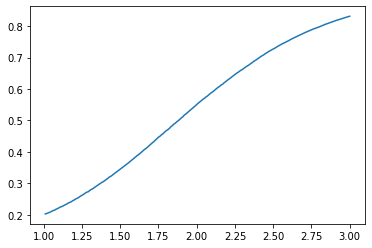

In [9]:
Ks=np.arange(1.01,3.01,0.01)
plt.plot(Ks,mean)